In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
df = pd.read_csv('/content/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
df_price=pd.read_csv('/content/sample_submission.csv')
df_price.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [18]:
df_price.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,179183.918243
std,421.321334,16518.303051
min,1461.000000,135751.318893
25%,1825.500000,168703.011202
50%,2190.000000,179208.665698
75%,2554.500000,186789.409363
max,2919.000000,281643.976117


<ipython-input-19-f601630cee0b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_price['SalePrice'],color='green')


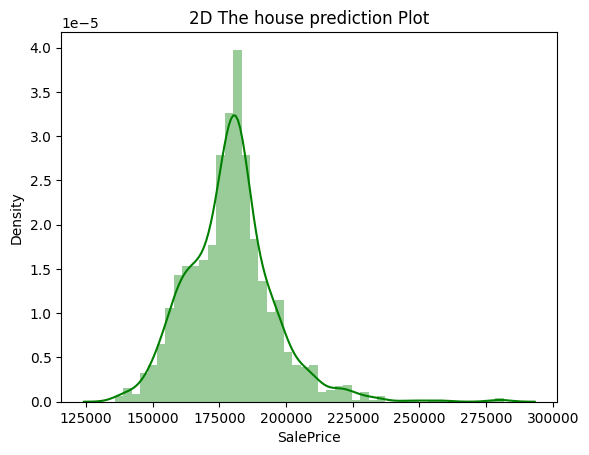

In [19]:
plt.title('2D The house prediction Plot')
sns.distplot(df_price['SalePrice'],color='green')
plt.show()

In [6]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

In [5]:
X = df[features]
y = df[target]

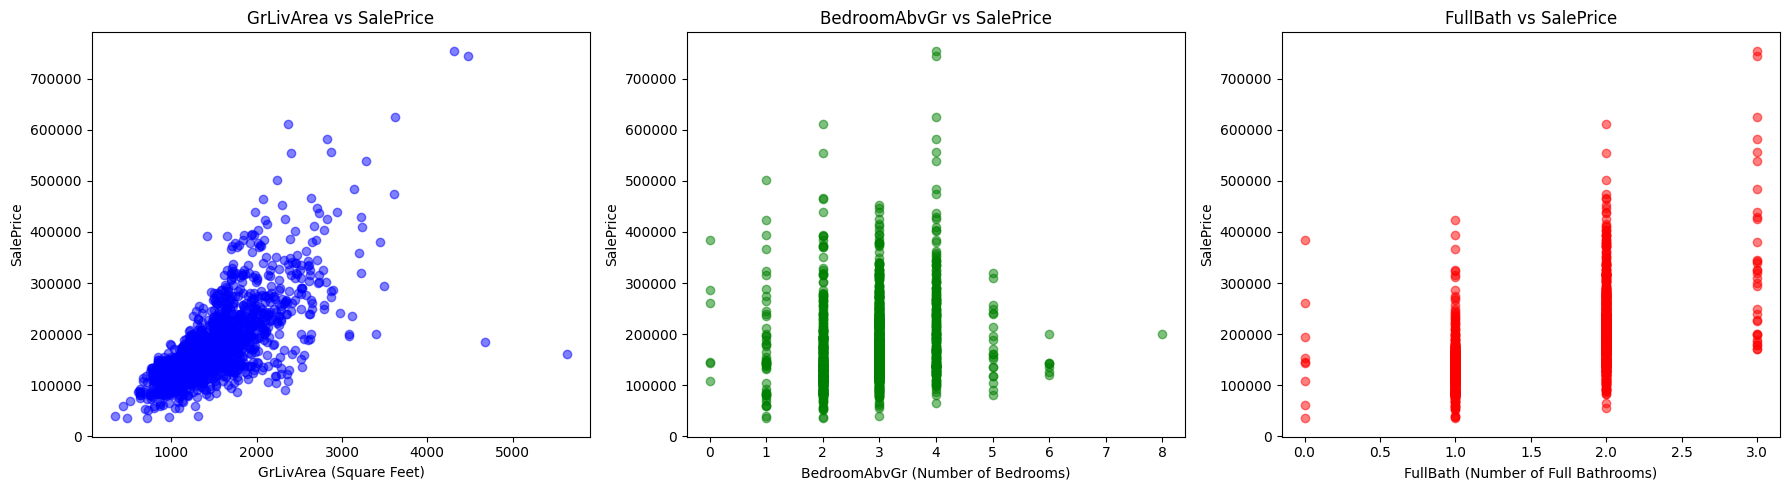

In [25]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.scatter(X['GrLivArea'], y, alpha=0.5, color='blue')
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea (Square Feet)')
plt.ylabel('SalePrice')


plt.subplot(1, 3, 2)
plt.scatter(X['BedroomAbvGr'], y, alpha=0.5, color='green')
plt.title('BedroomAbvGr vs SalePrice')
plt.xlabel('BedroomAbvGr (Number of Bedrooms)')
plt.ylabel('SalePrice')


plt.subplot(1, 3, 3)
plt.scatter(X['FullBath'], y, alpha=0.5, color='red')
plt.title('FullBath vs SalePrice')
plt.xlabel('FullBath (Number of Full Bathrooms)')
plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

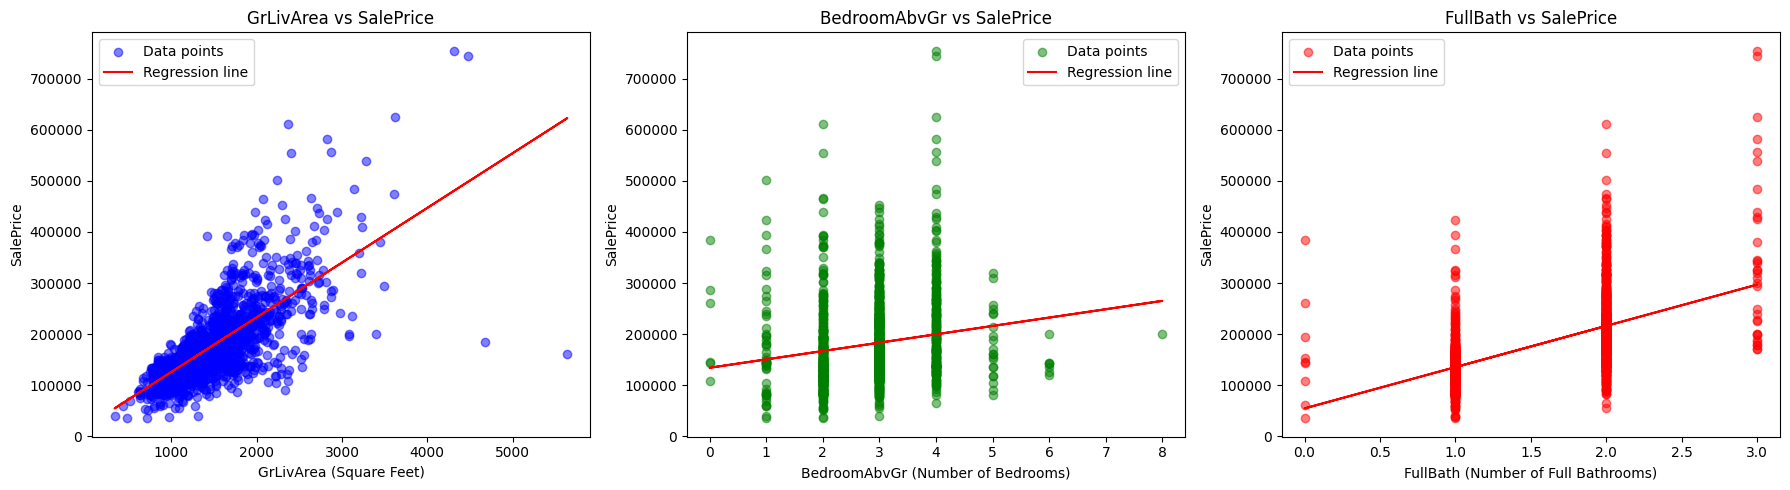

In [27]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(X['GrLivArea'], y, alpha=0.5, color='blue', label='Data points')
slope, intercept = np.polyfit(X['GrLivArea'], y, 1)
plt.plot(X['GrLivArea'], slope * X['GrLivArea'] + intercept, color='red', label='Regression line')
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea (Square Feet)')
plt.ylabel('SalePrice')
plt.legend()


plt.subplot(1, 3, 2)
plt.scatter(X['BedroomAbvGr'], y, alpha=0.5, color='green', label='Data points')
slope, intercept = np.polyfit(X['BedroomAbvGr'], y, 1)
plt.plot(X['BedroomAbvGr'], slope * X['BedroomAbvGr'] + intercept, color='red', label='Regression line')
plt.title('BedroomAbvGr vs SalePrice')
plt.xlabel('BedroomAbvGr (Number of Bedrooms)')
plt.ylabel('SalePrice')
plt.legend()


plt.subplot(1, 3, 3)
plt.scatter(X['FullBath'], y, alpha=0.5, color='red', label='Data points')
slope, intercept = np.polyfit(X['FullBath'], y, 1)
plt.plot(X['FullBath'], slope * X['FullBath'] + intercept, color='red', label='Regression line')
plt.title('FullBath vs SalePrice')
plt.xlabel('FullBath (Number of Full Bathrooms)')
plt.ylabel('SalePrice')
plt.legend()


plt.tight_layout()
plt.show()

In [30]:
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

Intercept: 43643.41638728275
Coefficients: [   114.20764181 -28384.10199226  29053.50659825]


In [9]:
y_pred = model.predict(X_test)

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3396389340.858873
R-squared: 0.5081866303840366
